In [1]:
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-19 14:39:05.107259: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input



In [5]:
path = './data/train/bee/'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'


img = load_img(fullname, target_size = (299,299))




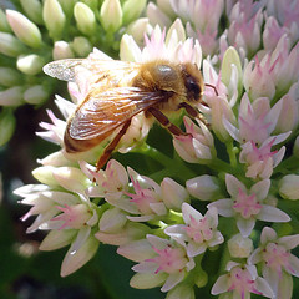

In [6]:
img

In [7]:
x= np.array(img)

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions



In [9]:
from tensorflow.keras.models import Sequential

In [10]:
train_imgs_dir= './data/train/'
input_size= 150

In [11]:
# Create image generator for train data and also augment the images

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(directory='./data/train/',
                                         target_size=(150,150),
                                         batch_size=20, shuffle = True
                                        ,class_mode = 'binary')


test_get = ImageDataGenerator(rescale=1./255)

test_ds = test_get.flow_from_directory('./data/test/',
                              target_size = (150,150),
                              batch_size = 20, shuffle = True, 
                                       class_mode = 'binary')


Found 3679 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [12]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [13]:
import tensorflow
tensorflow.__version__

'2.9.1'

In [14]:
base_model = Sequential()
                        
inputs = keras.Input(shape=(150,150,3))
base = base_model(inputs)

###########

conv = keras.layers.Conv2D(activation='relu', filters = 32, 
                           kernel_size = (3,3))(base)
inner = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

vectors = keras.layers.Flatten()(inner)

vectors2 = keras.layers.Dense(64, activation='relu')(vectors)
outputs = keras.layers.Dense(1, activation='sigmoid')(vectors2)

#drop = keras.layers.Dropout(dropout_rate)(inner)
model = keras.Model(inputs, outputs)

###############

optimizer  = keras.optimizers.SGD(lr=0.002, momentum=0.8)

loss = keras.losses.BinaryCrossentropy(from_logits= True)

model.compile(optimizer=optimizer,
              loss=loss,
          metrics=['accuracy'])

2023-11-19 14:39:19.214343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 14:39:19.221433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 14:39:19.222229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 14:39:19.223262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                             

In [16]:
def make_model():
    base_model = Sequential()
                        
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs)

    ###########

    conv = keras.layers.Conv2D(activation='relu', filters = 32, 
                               kernel_size = (3,3))(base)
    inner = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

    vectors = keras.layers.Flatten()(inner)

    vectors2 = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(vectors2)

    #drop = keras.layers.Dropout(dropout_rate)(inner)
    model = keras.Model(inputs, outputs)

    ###############

    optimizer  = keras.optimizers.SGD(lr=0.002, momentum=0.8)

    loss = keras.losses.BinaryCrossentropy()

    model.compile(optimizer=optimizer,
                  loss=loss,
              metrics=['accuracy'])
    return model

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'


)

In [18]:
model = make_model()
    
    
history = model.fit(train_ds, 
              epochs=10, 
              validation_data = test_ds)
    

Epoch 1/10


2023-11-19 14:39:32.940955: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 14:39:33.554312: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 14:39:33.554820: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 14:39:33.554860: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 14:39:33.555382: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 14:39:33.555459: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 10s 43ms/step - loss: 0.6551 - accuracy: 0.6026 - val_loss: 0.5894 - val_accuracy: 0.6961
Epoch 2/10
184/184 [==============================] - 8s 41ms/step - loss: 0.5930 - accuracy: 0.6812 - val_loss: 0.5477 - val_accuracy: 0.7288
Epoch 3/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5466 - accuracy: 0.7391 - val_loss: 0.5533 - val_accuracy: 0.7364
Epoch 4/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5141 - accuracy: 0.7605 - val_loss: 0.5317 - val_accuracy: 0.7440
Epoch 5/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4951 - accuracy: 0.7747 - val_loss: 0.5249 - val_accuracy: 0.7255
Epoch 6/10
184/184 [==============================] - 8s 44ms/step - loss: 0.4717 - accuracy: 0.7929 - val_loss: 0.5006 - val_accuracy: 0.7723
Epoch 7/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4580 - accuracy: 0.7918 - val_loss: 0.5018 - val_accuracy: 0.7625
Epoch 8/1

In [19]:
np.median(history.history['accuracy'])

0.7832291424274445

In [21]:
np.std(history.history['loss'])

0.08125939767123991

In [28]:
# Create image generator for train data and also augment the images

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=50,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(input_size,input_size),
                                         batch_size=20, shuffle = True, class_mode = 'binary')


test_get = ImageDataGenerator(rescale=1./255)

test_ds = test_get.flow_from_directory('./data/test/',
                              target_size = (input_size,input_size),
                              batch_size = 20, shuffle = True, class_mode = 'binary')

Found 3679 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [29]:
model = make_model()
    
    
history = model.fit(train_ds, 
              epochs=10, 
              validation_data = test_ds)
    

Epoch 1/10
184/184 [==============================] - 23s 121ms/step - loss: 0.6883 - accuracy: 0.5300 - val_loss: 0.6763 - val_accuracy: 0.5730
Epoch 2/10
184/184 [==============================] - 22s 121ms/step - loss: 0.6744 - accuracy: 0.5567 - val_loss: 0.6555 - val_accuracy: 0.5359
Epoch 3/10
184/184 [==============================] - 22s 121ms/step - loss: 0.6662 - accuracy: 0.5825 - val_loss: 0.6348 - val_accuracy: 0.6329
Epoch 4/10
184/184 [==============================] - 22s 121ms/step - loss: 0.6470 - accuracy: 0.6238 - val_loss: 0.6115 - val_accuracy: 0.6329
Epoch 5/10
184/184 [==============================] - 22s 121ms/step - loss: 0.6277 - accuracy: 0.6423 - val_loss: 0.5996 - val_accuracy: 0.6819
Epoch 6/10
184/184 [==============================] - 23s 123ms/step - loss: 0.5896 - accuracy: 0.7026 - val_loss: 0.5507 - val_accuracy: 0.7484
Epoch 7/10
184/184 [==============================] - 22s 122ms/step - loss: 0.5665 - accuracy: 0.7176 - val_loss: 0.5393 - val_ac

In [35]:
np.mean(history.history['val_loss'])

0.5837583482265473

In [33]:
history.history['val_accuracy'][5:]

[0.7483659982681274,
 0.7527233362197876,
 0.7298474907875061,
 0.7374727725982666,
 0.7647058963775635]

In [34]:
np.mean(history.history['val_accuracy'][5:])

0.7466230988502502